# Superdense

**Definição:** Dense code usa um qubit compartilhado com um pars EPR para decondificar e transmitir dois bits clássicos.




 *Obs.:* EPR ou  Einstein–Podolsky–Rosen paradox (EPR paradox) é um paradoxo que avalia que em certas circunstancias a medição do estado de A pode determinar com um precisão arbritária o estado de outro qubit B, mesmo a longas distâncias desde que estejam emaranhados.<br> Fonte: https://phys.org/news/2018-04-einstein-podolsky-rosen-paradox-many-particle.html

### Como funciona?

Agora iremos supor que Alice e Bob querem se comunicar e que Alice tem o primeiro qubit e Bob o segundo.

<br>1.Inicialmente irimos ter dois bits emaranhados:

$|\psi_0\rangle = \frac{1}{\sqrt{2}}(|0_A0_B\rangle + |1_A1_B)$

Sabendo disso, devemos ter em mente que Alice só pode transforma o qubit dela e Bob só poderá transformar o qubit dele. Isso poderá ser feito da seguinte forma: Se alice tem n qubits e Bob m qubits, temos que a transformação realizada por alice será $I^{m}\otimes U$, onde U é a matrix de transformação para n qubits, enquanto a de Bob $I^n\otimes U$ onde U é a matrix de transformação para m qubits.

### O que é feito?


Alice que transmiti dois bits que representam valores entre 0 e 3 para isso ele realiza uma transformação no seu qubit $|\psi_0\rangle$.

Valor______Transformação_______Novo Estado
<br>


0 || $|\psi_0\rangle = (I\otimes I)|\psi_0\rangle$   ||  $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ <br>
1 || $|\psi_0\rangle = (X \otimes I)|\psi_0\rangle$  ||  $\frac{1}{\sqrt{2}}(|10\rangle - |01\rangle)$  <br>
2 || $|\psi_0\rangle = (Z \otimes I)|\psi_0\rangle$  ||  $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$  <br>
3 || $|\psi_0\rangle = (Y\otimes I)|\psi_0\rangle$   ||  $\frac{1}{\sqrt{2}}(-|10\rangle + |01\rangle)$ <br>

Depois disso Bob usa C_not e nos dois bits emaranhados e depois apliaca Hadamard: 
<br>
$ \begin{cases}
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
\frac{1}{\sqrt{2}}(|10\rangle - |01\rangle) \\   
\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\ 
\frac{1}{\sqrt{2}}(-|10\rangle + |01\rangle) \\  
\end{cases} $

$C_not$
$\rightarrow$

$ \begin{cases}
\frac{1}{\sqrt{2}}(|00\rangle + |10\rangle) \\
\frac{1}{\sqrt{2}}(|11\rangle - |01\rangle) \\ 
\frac{1}{\sqrt{2}}(|00\rangle - |10\rangle) \\ 
\frac{1}{\sqrt{2}}(-|11\rangle + |01\rangle) \\  
\end{cases} $
=
$ \begin{cases}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes|0\rangle \\
\frac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\otimes|1\rangle \\ 
\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\otimes|0\rangle \\ 
\frac{1}{\sqrt{2}}(-|1\rangle + |0\rangle)\otimes|1\rangle \\  
\end{cases} $

$H\otimes I$ 
$\rightarrow$

$ \begin{cases}
 |00\rangle \\
 |01\rangle \\ 
 |10\rangle \\ 
 |11\rangle \\  
\end{cases} $


Ao final do processo Bob terá os mesmo bits que foram enviados por Alice.

### Exemplo: Supondo que o bit represente o valor 1

In [2]:
import qiskit as qkit 
import time
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram


Iniciando os registradores quânticos e clássicos

In [3]:
rq = qkit.QuantumRegister(size=2)
rc = qkit.ClassicalRegister(size=2)

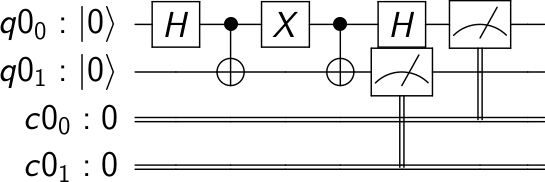

In [4]:
superdense = qkit.QuantumCircuit(rq, rc)


superdense.h(rq[0])
superdense.cx(rq[0], rq[1])

superdense.x(rq[0])

superdense.cx(rq[0], rq[1])
superdense.h(rq[0])
superdense.measure(rq[0], rc[0])
superdense.measure(rq[1], rc[1])
circuit_drawer(superdense)


<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 0 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 1 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 2 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 3 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 4 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 5 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 6 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x000002875EE5A3C8>>
Faltam 7 segundos
<bound method AerJob.status of <qiskit.backends.aer.aerjob.AerJob object at 0x00

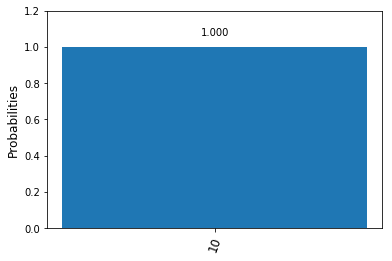

In [5]:

shots = 50
job = qkit.execute(superdense, backend= Aer.get_backend("qasm_simulator_py"), shots=shots)
k =0 
wait_time = 1 
while k < shots:
    print(job.status)
    print("Faltam {0} segundos".format(k))
    k = k + wait_time
    time.sleep(wait_time)
    
results_sim = job.result()
outputs_sim = results_sim.get_counts()

plot_histogram(outputs_sim)